In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()    
        
        model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
        
        model.add(Conv2D(50, kernel_size=5, border_mode="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
        
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model
        
NB_EPOCH = 20 #Number of iterations
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam() #type of optimizer 
IMG_ROWS, IMG_COLS = 28, 28
VALIDATION_SPLIT = 0.2 #how much of the dataset is reserved for validation
NB_CLASSES = 10 #Number of outputs
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

K.set_image_dim_ordering("th")

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]


print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)


print("Test score:", score[0])
print("Test accuracy:", score[1])


        

        
        
        
        
        
        
        
        
        
        
        

Using TensorFlow backend.


60000 train samples
10000 test samples


C:\Users\Ryan\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, padding="same", kernel_size=5)`


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 39s 809us/step - loss: 0.1816 - acc: 0.9448 - val_loss: 0.0670 - val_acc: 0.9787
Epoch 2/20
48000/48000 [==============================] - 22s 463us/step - loss: 0.0486 - acc: 0.9851 - val_loss: 0.0501 - val_acc: 0.9842
Epoch 3/20
48000/48000 [==============================] - 22s 467us/step - loss: 0.0333 - acc: 0.9894 - val_loss: 0.0333 - val_acc: 0.9897
Epoch 4/20
48000/48000 [==============================] - 24s 499us/step - loss: 0.0225 - acc: 0.9928 - val_loss: 0.0355 - val_acc: 0.9893
Epoch 5/20
48000/48000 [==============================] - 25s 525us/step - loss: 0.0168 - acc: 0.9944 - val_loss: 0.0392 - val_acc: 0.9888
Epoch 6/20
48000/48000 [==============================] - 27s 554us/step - loss: 0.0128 - acc: 0.9957 - val_loss: 0.0319 - val_acc: 0.9906
Epoch 7/20
48000/48000 [==============================] - 27s 554us/step - loss: 0.0108 - acc: 0.9964 - val_loss: 0.

dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])


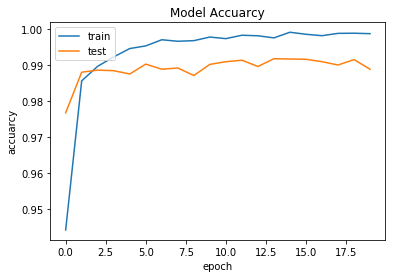

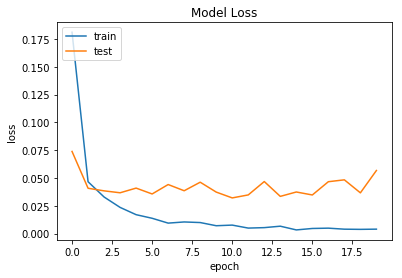

In [6]:
print(history.history.keys())

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuarcy")
plt.ylabel("accuarcy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc='upper left')
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()
















